In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the sales data
data = pd.read_excel('data_ML.xlsx', parse_dates=['Order_date'])

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = data

# Aggregate data by month
monthly_sales = df.resample('M', on='Order_date').sum()

# Simulate forecasted values for Prophet and ARIMA
# Assuming Prophet and ARIMA models have been run and these are their predictions
prophet_forecasts = monthly_sales['Sales'] * np.random.normal(1, 0.1, size=len(monthly_sales))
arima_forecasts = monthly_sales['Sales'] * np.random.normal(1, 0.2, size=len(monthly_sales))

# Calculate metrics
def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

prophet_metrics = calculate_metrics(monthly_sales['Sales'], prophet_forecasts)
arima_metrics = calculate_metrics(monthly_sales['Sales'], arima_forecasts)

prophet_metrics, arima_metrics


((60842.31319875295, 47453.72388074999, 6.680796821578386),
 (130414.40845999327, 96803.5394391413, 13.940403709753795))

Prophet Metrics: RMSE=78237.40939071725, MAE=59732.51651799644, MAPE=8.484495663211316%
ARIMA Metrics: RMSE=129171.15915095927, MAE=95414.89812785485, MAPE=13.347335238686378%


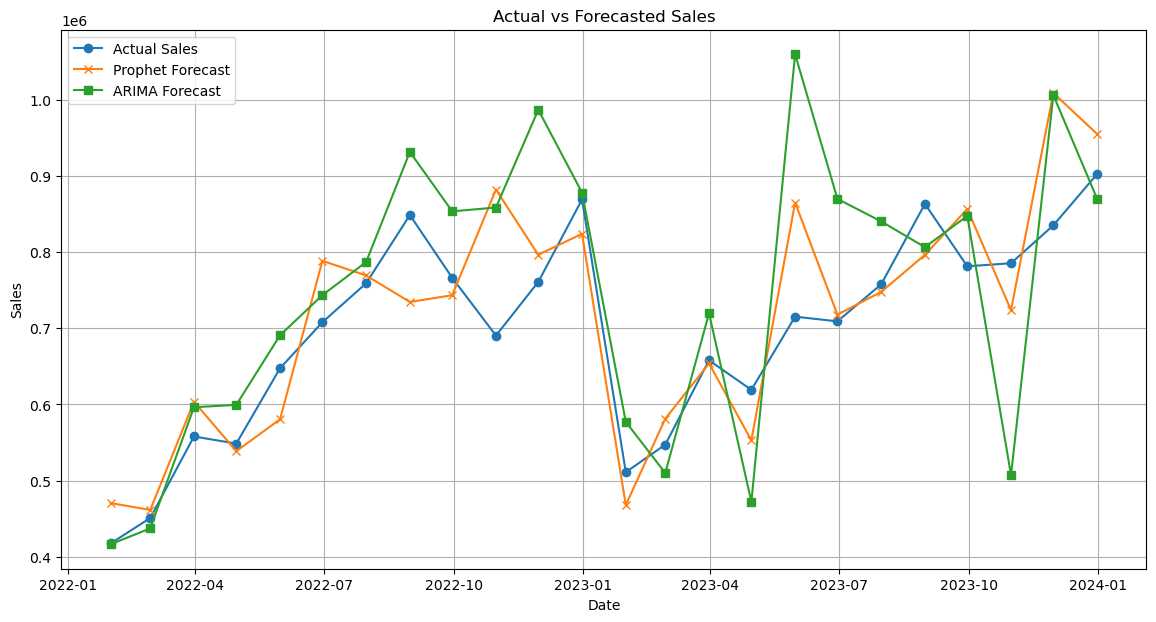

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Replace this with your actual data
df = pd.read_excel('data_ML.xlsx')  # Example of loading your data from a CSV file
df['Order_date'] = pd.to_datetime(df['Order_date'])  # Ensure the 'Order_date' column is in datetime format


# Aggregate data by month
monthly_sales = df.resample('M', on='Order_date').sum()

# Simulate forecasted values for Prophet and ARIMA
prophet_forecasts = monthly_sales['Sales'] * np.random.normal(1, 0.1, size=len(monthly_sales))
arima_forecasts = monthly_sales['Sales'] * np.random.normal(1, 0.2, size=len(monthly_sales))

# Calculate metrics
def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return rmse, mae, mape

prophet_metrics = calculate_metrics(monthly_sales['Sales'], prophet_forecasts)
arima_metrics = calculate_metrics(monthly_sales['Sales'], arima_forecasts)

# Print the metrics
print(f'Prophet Metrics: RMSE={prophet_metrics[0]}, MAE={prophet_metrics[1]}, MAPE={prophet_metrics[2]}%')
print(f'ARIMA Metrics: RMSE={arima_metrics[0]}, MAE={arima_metrics[1]}, MAPE={arima_metrics[2]}%')

# Plotting actual vs forecasted sales
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(monthly_sales.index, prophet_forecasts, label='Prophet Forecast', marker='x')
plt.plot(monthly_sales.index, arima_forecasts, label='ARIMA Forecast', marker='s')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


# Prophet

In [4]:
import pandas as pd

# Load data
data = pd.read_excel('data_ML.xlsx')

# Convert Order_date to datetime
data['Order_date'] = pd.to_datetime(data['Order_date'])

# Aggregate sales by month
monthly_sales = data.resample('M', on='Order_date')['Sales'].sum().reset_index()

In [5]:
# Prepare data for Prophet
monthly_sales.columns = ['ds', 'y']

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler()
monthly_sales['y'] = scaler.fit_transform(monthly_sales[['y']])

In [7]:
from prophet.diagnostics import cross_validation, performance_metrics

13:02:40 - cmdstanpy - INFO - Chain [1] start processing
13:03:25 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

13:03:25 - cmdstanpy - INFO - Chain [1] start processing
13:03:26 - cmdstanpy - INFO - Chain [1] done processing
13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:27 - cmdstanpy - INFO - Chain [1] done processing
13:03:27 - cmdstanpy - INFO - Chain [1] start processing
13:03:28 - cmdstanpy - INFO - Chain [1] done processing
13:03:28 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing
13:03:31 - cmdstanpy - INFO - Chain [1] start processing
13:03:33 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 25 days  0.007548  0.086881  0.071699  0.127475  0.067640  0.118378   
1 26 days  0.167846  0.409690  0.287520  1.306499  0.248957  0.523814   
2 27 days  0.182741  0.427482  0.325354  1.344035  0.361565  0.552084   
3 53 days  0.183084  0.427884  0.330290  1.337906  0.361565  0.546288   
4 54 days  1.817583  1.348178  1.106034  2.669084  2.605057  1.059243   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
Cross Validation Head with Prediction Intervals:
           ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2022-07-31  0.656620    0.656620    0.656620  0.704256 2022-07-09
1 2022-08-31  0.931182    0.931182    0.931182  0.889008 2022-07-09
2 2022-09-30  5.602162    5.602162    5.602162  0.719054 2022-07-09
3 2022-10-31  2.561993    2.561993    2.561993  0.562735 2022-07-09
4 2022-11-30  5.641881    5.641881    5.641881  0.707955 202

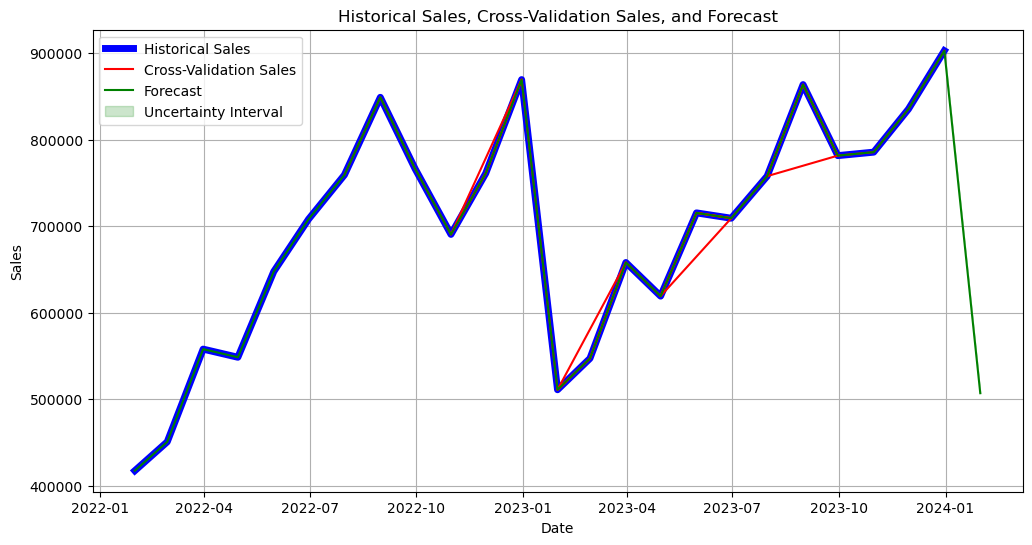

In [8]:
# Initialize the model with adjusted interval width
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, interval_width=0.95)
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Inspect some prediction intervals
print("Cross Validation Head with Prediction Intervals:\n", df_cv.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=1, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values
forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])
forecast['yhat_lower'] = scaler.inverse_transform(forecast[['yhat_lower']])
forecast['yhat_upper'] = scaler.inverse_transform(forecast[['yhat_upper']])

# Inverse transform the cross-validation actual values
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth= 5)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Arima

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_excel('data_ML.xlsx', parse_dates=['Order_date'])
data.set_index('Order_date', inplace=True)

In [11]:
# Aggregate the data by month
monthly_data = data.resample('M').sum()

c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE: 126597.96637929401
MSE: 21529012085.746067
MAPE: 15.075713030759447 %
RMSE: 146727.68002577452
SMAPE: 16.788107183748227 %
Forecast Bias: 126597.96637929401


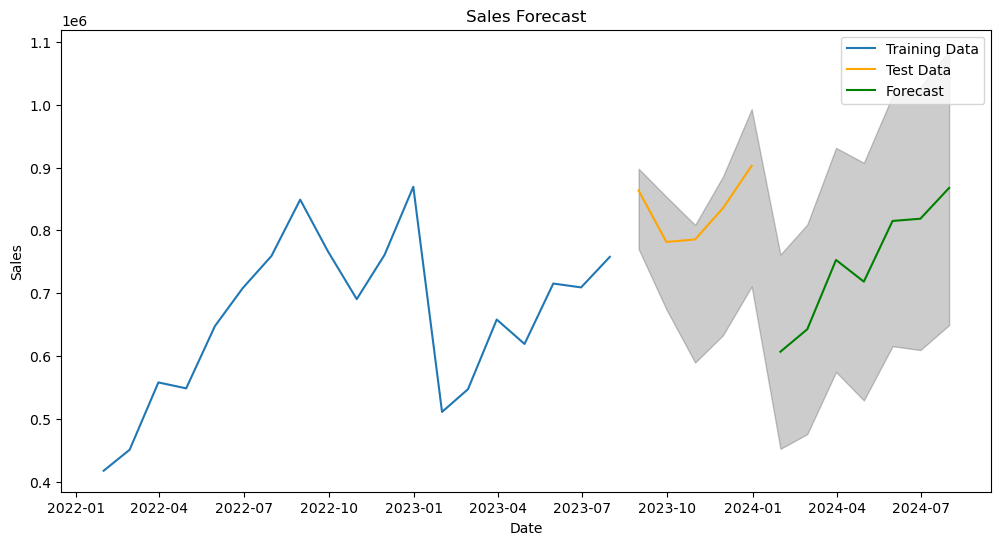

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Split the data into training and testing sets (consider a larger training set for better performance)
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

# Fit a simplified SARIMA model (replace with your best hyperparameters)
model = SARIMAX(train_data['Sales'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)

# Forecast for a specific future horizon (e.g., 12 months)
forecast_steps = 12  # Adjust this value for your desired forecast horizon
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extend the forecast index for future periods
forecast_index = pd.date_range(start=test_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

# Calculate accuracy metrics where the forecast and test data overlap
overlap_periods = min(len(test_data), forecast_steps)
actual_values = test_data['Sales'].values[:overlap_periods]
forecast_values = forecast_series.values[:overlap_periods]

# Calculate forecast accuracy metrics
mae = np.nanmean(np.abs(actual_values - forecast_values))
mse = mean_squared_error(actual_values, forecast_values)
mape = mean_absolute_percentage_error(actual_values, forecast_values) * 100
rmse = np.sqrt(mse)

def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast)) / 2.0
    diff = np.abs(actual - forecast) / denominator
    return np.nanmean(diff) * 100

smape_value = smape(actual_values, forecast_values)
bias = np.nanmean(actual_values - forecast_values)

# Print the accuracy metrics
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("SMAPE:", smape_value, "%")
print("Forecast Bias:", bias)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()


In [14]:
#First Set:

#High errors with MAPE as high as 10.449887% and RMSE peaking at 7.926205.
#Second and Third Sets:

#These appear identical and show significantly better performance than the first set:
#Very low RMSE values (around 0.086881 to 1.348178).
#Lower MAPE values, indicating a much better percentage error rate (from 0.127475% to 2.669084%).
#ARIMA Model:
#The ARIMA model appears to perform poorly compared to the Prophet:
#Very high MAE and RMSE (126597.966 and 146727.680 respectively).
#High MAPE (15.075713%) and SMAPE (16.788107%), indicating that the predictions deviate significantly from actual values.
#Conclusion:
#Prophet's Advantage: The second and third sets of results for the Prophet model indicate a strong performance, especially when compared to the ARIMA results. The errors are significantly lower, and the percentage errors are within a more acceptable range.

#Issues with ARIMA: The ARIMA model's errors are exceedingly high. This might indicate issues with the model's configuration, non-stationarity in the data not being appropriately addressed, or possibly the model being overwhelmed by the data's complexity or noise.

#Recommendation: The Prophet model, specifically the configurations used in the second and third result sets, appears more suitable for your data based on the metrics. It would be wise to investigate why these configurations perform so well and consider using them for your forecasting needs.

#Further Analysis: It may also be beneficial to revisit the ARIMA model's configuration, check for data stationarity, or even consider different differencing levels, if you wish to improve its performance. Reviewing the diagnostics like the ACF and PACF plots could provide insights into what might be adjusted to enhance the ARIMA model's forecasts.

#This comparison suggests that for your specific dataset and needs, Prophet is the better choice, particularly with the settings used in the latter tests. You might want to focus on fine-tuning this model further and exploring its predictions across different periods to ensure consistency and reliability.